In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage.io import imread, imsave
import skimage.feature as feat

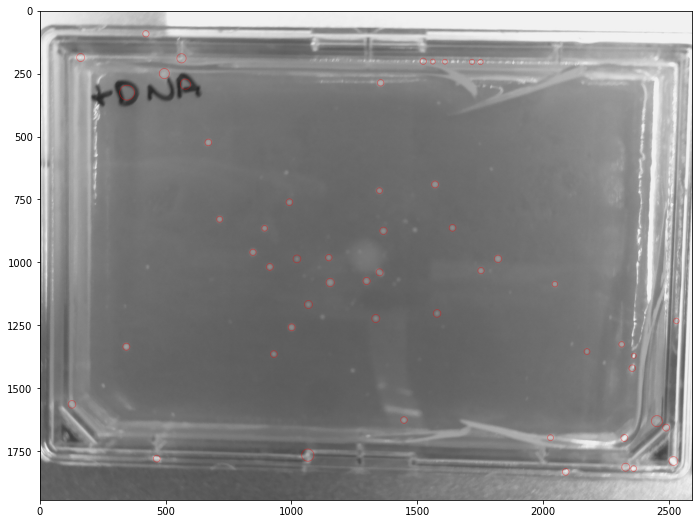

In [10]:
image = 'real/real8.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()

crop = img
# crop = img[100:1600,150:2450]

gray = cv2.cvtColor(crop,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
invert = cv2.bitwise_not(blur)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 30;
params.maxThreshold = 190;

params.filterByArea = True
params.minArea = 200
params.maxArea = 99999

params.filterByCircularity = True
params.minCircularity = 0.3

params.filterByConvexity = False
params.minConvexity = 0.87

params.filterByInertia = True
params.minInertiaRatio = 0.1

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(invert)
blobs = cv2.drawKeypoints(gray, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(blobs)
plt.imsave('detected/detected8.jpg', blobs)

In [ ]:

# print (all_circs_rounded)
# print (all_circs_rounded.shape)
# print ('there are' + str(all_circs_rounded.shape[1]) + 'circles')

In [ ]:
all_circs1 = cv2.HoughCircles(thresh1, cv2.HOUGH_GRADIENT, 5, 120, param1=50, param2=130, minRadius=20, maxRadius=100)
all_circs_rounded1 = np.uint16(np.around(all_circs1))

# all_circs2 = cv2.HoughCircles(thresh2, cv2.HOUGH_GRADIENT, 5, 100, param1=50, param2=130, minRadius=20, maxRadius=100)
# all_circs_rounded2 = np.uint16(np.around(all_circs2))

In [ ]:
count = 1
for i in all_circs_rounded1[0, :]:
    cv2.circle(crop, (i[0],i[1]), i[2], (36,255,12), 2)
    count += 1

count = 1
for i in all_circs_rounded2[0, :]:
    cv2.circle(crop, (i[0],i[1]), i[2], (36,255,12), 2)
    count += 1

In [ ]:
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(crop)